In [18]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-08-27,33.520000,34.099998,33.150002,33.259998,27.852419,58522300
1,2013-08-28,33.389999,33.599998,33.000000,33.020000,27.651428,44257400
2,2013-08-29,32.930000,33.599998,32.799999,33.549999,28.095263,45284700
3,2013-08-30,33.369999,33.480000,33.090000,33.400002,27.969646,42790200
4,2013-09-03,31.750000,32.070000,31.290001,31.879999,26.696783,154507000
...,...,...,...,...,...,...,...
2512,2023-08-21,317.929993,322.769989,317.040009,321.880005,321.880005,24040000
2513,2023-08-22,325.500000,326.079987,321.459991,322.459991,322.459991,16102000
2514,2023-08-23,323.820007,329.200012,323.459991,327.000000,327.000000,21166400
2515,2023-08-24,332.850006,332.980011,319.959991,319.970001,319.970001,23281400


In [19]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2013-08-27,33.259998
1,2013-08-28,33.020000
2,2013-08-29,33.549999
3,2013-08-30,33.400002
4,2013-09-03,31.879999
...,...,...
2512,2023-08-21,321.880005
2513,2023-08-22,322.459991
2514,2023-08-23,327.000000
2515,2023-08-24,319.970001


In [20]:
df['Date']

0       2013-08-27
1       2013-08-28
2       2013-08-29
3       2013-08-30
4       2013-09-03
           ...    
2512    2023-08-21
2513    2023-08-22
2514    2023-08-23
2515    2023-08-24
2516    2023-08-25
Name: Date, Length: 2517, dtype: object

In [21]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [22]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\simra\AppData\Local\Temp\ipykernel_14100\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2013-08-27
1      2013-08-28
2      2013-08-29
3      2013-08-30
4      2013-09-03
          ...    
2512   2023-08-21
2513   2023-08-22
2514   2023-08-23
2515   2023-08-24
2516   2023-08-25
Name: Date, Length: 2517, dtype: datetime64[ns]

In [23]:
df.index = df.pop('Date')
df

,Close
Date,
2013-08-27,33.259998
2013-08-28,33.020000
2013-08-29,33.549999
2013-08-30,33.400002
2013-09-03,31.879999
...,...
2023-08-21,321.880005
2023-08-22,322.459991
2023-08-23,327.000000


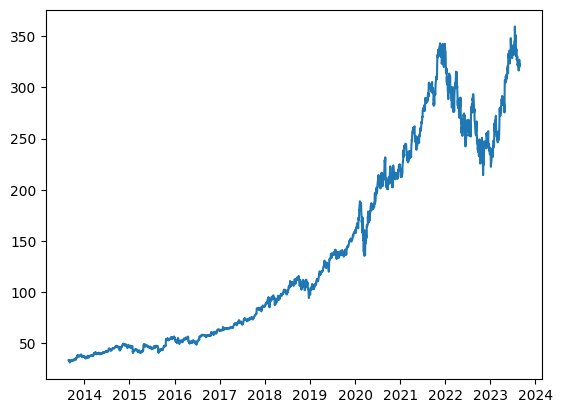

In [24]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [25]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [26]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

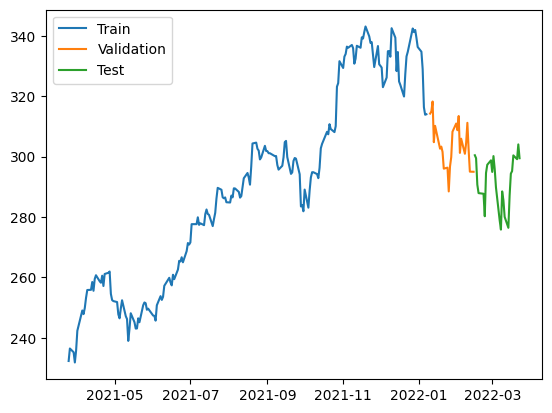

In [27]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 145ms/step - loss: 84568.0781 - mean_absolute_error: 289.0626 - val_loss: 92301.7891 - val_mean_absolute_error: 303.7249
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 84395.3047 - mean_absolute_error: 288.7638 - val_loss: 92102.3594 - val_mean_absolute_error: 303.3964
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 84183.0859 - mean_absolute_error: 288.3976 - val_loss: 91836.4375 - val_mean_absolute_error: 302.9579
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 83893.9766 - mean_absolute_error: 287.8935 - val_loss: 91464.5078 - val_mean_absolute_error: 302.3434
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 83483.4922 - mean_absolute_error: 287.1801 - val_loss: 90924.1562 - val_mean_absolute_error: 301.4485
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 82901.3047 - mean_absolute_error: 286.1654 - val_loss: 90

7/7 [==============================] - 1s 3ms/step


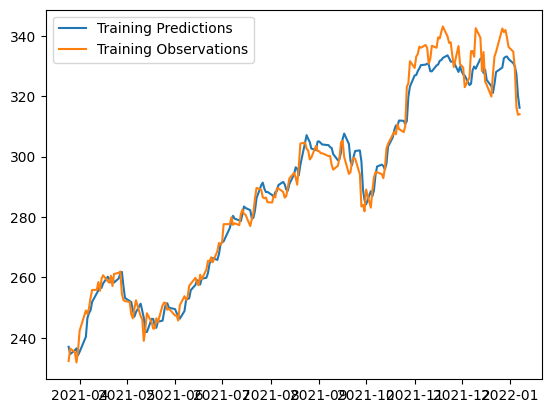

In [29]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 42ms/step


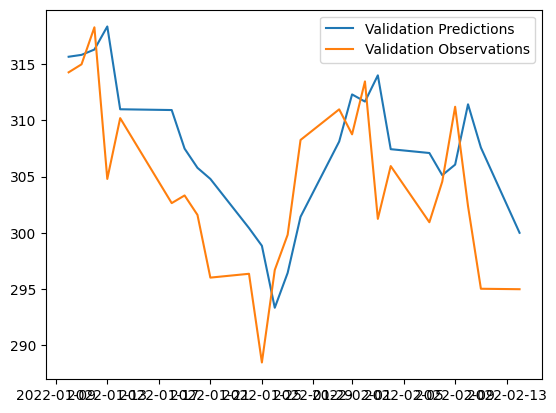

In [30]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 35ms/step


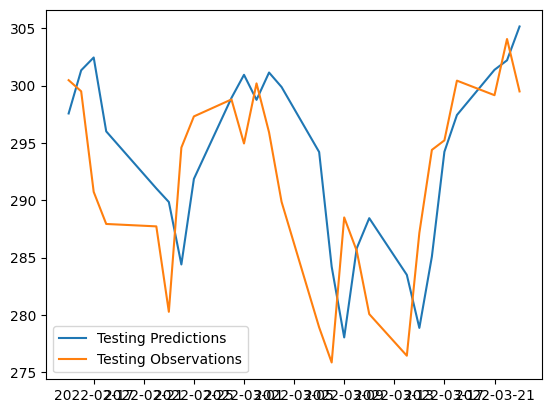

In [31]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

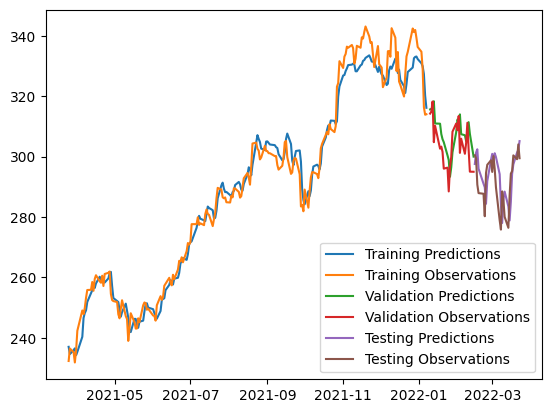

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [33]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 37ms/step


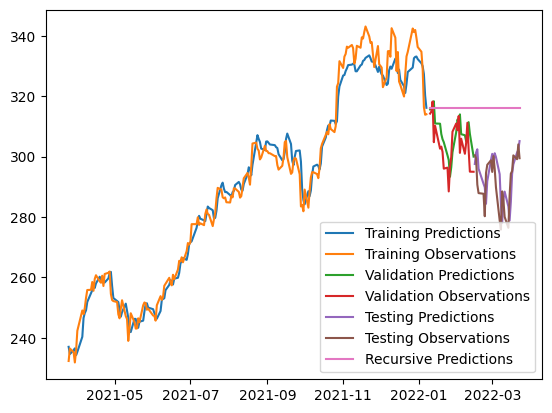

In [34]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])